# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          902471587
verification code:  5f2766cd9aa8
======================================================================

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 3114 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-09 06:11:00,Campus,102,1.0,4.41,Mobile,False
1,1001,2025-11-09 06:39:00,Suburb,101,2.0,6.28,Credit,True
2,1005,2025-11-09 07:00:00,Suburb,107,1.0,1.93,Credit,True
3,1007,2025-11-09 07:01:00,Suburb,109,1.0,1.57,Credit,False
4,1003,2025-11-09 07:05:00,Suburb,105,1.0,3.51,Credit,True


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [37]:
# Task 1: use isna(), nunique(), min/max on timestamp

#Task 1.1 - How many missing values are in each column? 
print("Task 1.1 - How many missing values are in each column? \n ---")
print("Missing Data:\n")
print(sales.isna().sum())



Shape:
---
ndim: 2
shape: (3114, 8)
Task 1.1 - How many missing values are in each column? 
 ---
Missing Data:

transaction_id    0
timestamp         0
location          0
product_id        0
quantity          5
revenue           2
payment_method    0
loyalty_member    0
dtype: int64


In [19]:
#Task 1.2 - How many unique product IDs appear in the sales data? Compare this to the catalog size.
print("Task 1.2 - How many unique product IDs appear in the sales data? Compare this to the catalog size.\n ---")
print("Unique Values by feature:\n")
print(sales.nunique())

Task 1.2 - How many unique product IDs appear in the sales data? Compare this to the catalog size.
 ---
Unique Values by feature:

transaction_id    3112
timestamp         2639
location             3
product_id          21
quantity             3
revenue            967
payment_method       3
loyalty_member       2
dtype: int64


In [22]:
#Task 1.3 - What is the date range (earliest and latest transaction)?

print("Task 1.3 - What is the date range (earliest and latest transaction)?\n ---")
# Finding the first transaction
earliest_date = sales['timestamp'].min()
print(f"First Transaction Date & Time: {earliest_date}")

# Finding the last transaction
latest_date = sales['timestamp'].max()
print(f"Last Transaction Date & Time: {latest_date}")

Task 1.3 - What is the date range (earliest and latest transaction)?
 ---
First Transaction Date & Time: 2025-11-09 06:11:00
Last Transaction Date & Time: 2025-11-22 21:28:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [29]:
# Task 2: use pd.merge() with appropriate join type
# Left join
print("Task 2: Merge Sales with Products using a left join \n ---")
merge = pd.merge(sales, products, on='product_id', how='left')
merge

Task 2: Merge Sales with Products using a left join 
 ---


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1000,2025-11-09 06:11:00,Campus,102,1.0,4.41,Mobile,False,Cappuccino,Coffee,1.8
1,1001,2025-11-09 06:39:00,Suburb,101,2.0,6.28,Credit,True,Espresso,Coffee,1.2
2,1005,2025-11-09 07:00:00,Suburb,107,1.0,1.93,Credit,True,Green Tea,Tea,0.8
3,1007,2025-11-09 07:01:00,Suburb,109,1.0,1.57,Credit,False,Herbal Tea,Tea,0.7
4,1003,2025-11-09 07:05:00,Suburb,105,1.0,3.51,Credit,True,Cold Brew,Coffee,1.5
...,...,...,...,...,...,...,...,...,...,...,...
3109,4107,2025-11-22 19:27:00,Suburb,107,1.0,1.85,Credit,True,Green Tea,Tea,0.8
3110,4106,2025-11-22 19:47:00,Suburb,109,1.0,1.56,Mobile,False,Herbal Tea,Tea,0.7
3111,4109,2025-11-22 20:23:00,Campus,108,1.0,2.25,Credit,False,Chai Latte,Tea,1.2
3112,4110,2025-11-22 20:47:00,Downtown,108,1.0,3.42,Mobile,False,Chai Latte,Tea,1.2


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [75]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

#Task 3.1 - Compare the shape of the merged DataFrame to the original sales data
sales_shape = sales.shape
merge_ndim = merge.ndim
merge_shape = merge.shape
print("Task 3.1 - Compare the shape of the merged DataFrame to the original sales data:\n---")
print(f"Prior to Merge, shape of the Sales data is {sales_shape}")
print(f"After Merge, shape of Sales data is: {merge_shape}")
print("---")
print(f"There are {merge_shape[1] - sales_shape[1]} more columns in merge, than there are in shape. As expected") 


Task 3.1 - Compare the shape of the merged DataFrame to the original sales data:
---
Prior to Merge, shape of the Sales data is (3114, 8)
After Merge, shape of Sales data is: (3114, 11)
---
There are 3 more columns in merge, than there are in shape. As expected


In [71]:
# Task 3.2 - Check if any rows have missing values in the product columns (name, category, cost)
print("Task 3.2 - Check if any rows have missing values in the product columns (name, category, cost): \n---")
merge[['name','category','cost']].isna().sum()

missing_product = merge[merge['name'].isna() == True]

print(f"There are {missing_product.shape[0]} rows missing values in the product columns")

Task 3.2 - Check if any rows have missing values in the product columns (name, category, cost): 
---
There are 14 rows missing values in the product columns


In [63]:
# Task 3.3 - If there are missing values, identify which product_id(s) are causing the problem
print("Task 3.3 - If there are missing values, identify which product_id(s) are causing the problem: \n---")
missing_product = merge[merge['name'].isna() == True]

missing_product_ids = missing_product['product_id'].unique().tolist()

print(f"Product IDs with missing names: {missing_product_ids}")
print(f"\nTotal number of unique products with missing names: {len(missing_product_ids)}")

Task 3.3 - If there are missing values, identify which product_id(s) are causing the problem: 
---
Product IDs with missing names: [200, 201, 199]

Total number of unique products with missing names: 3


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [90]:
# Task 4: create profit column, then groupby with .agg()
print("Task 4 - create profit column, then groupby category and sort descending by profit:  \n---")
merge['profit'] = merge['revenue'] - (merge['quantity'] * merge['cost'])

summary = merge.groupby('category').agg(
                    total_profit=('profit', 'sum'),
                    transaction_count=('profit', 'count')
                    ).sort_values('total_profit', ascending=False)

summary

Task 4 - create profit column, then groupby category and sort descending by profit:  
---


,total_profit,transaction_count
category,,
Sandwich,4841.64,687
Coffee,2694.44,1089
Pastry,1826.14,628
Tea,1038.68,689


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [113]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

print("Task 5 - Flat Table with Profit by Category and Location: \n---")

category_location_summary = merge.groupby(['category', 'location']).agg({
    'profit': ['sum', 'mean', 'count']
}).reset_index()

category_location_summary.columns = ['category', 'location', 'total_profit', 'avg_profit', 'transaction_count']

category_location_summary.sort_values('total_profit', ascending = False)

Task 5 - Flat Table with Profit by Category and Location: 
---


,category,location,total_profit,avg_profit,transaction_count
7,Sandwich,Downtown,2918.25,7.951635,367
0,Coffee,Campus,1277.34,2.050305,623
1,Coffee,Downtown,1212.48,3.207619,378
8,Sandwich,Suburb,1073.64,6.627407,162
6,Sandwich,Campus,849.75,5.378165,158
4,Pastry,Downtown,761.70,3.446606,221
3,Pastry,Campus,687.19,2.463047,279
11,Tea,Suburb,432.46,1.451208,298
5,Pastry,Suburb,377.25,2.947266,128
10,Tea,Downtown,351.65,1.803333,195


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

Task 6 - Visualize Category Profitability: 
---


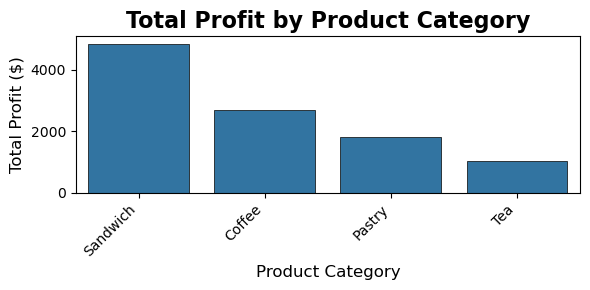

In [121]:
# Task 6: use sns.barplot() with aggregated data
print("Task 6 - Visualize Category Profitability: \n---")
category_profit = merge.groupby('category', as_index=False).agg(
    total_profit=('profit', 'sum')
).sort_values('total_profit', ascending=False)

# SNS Bar Plot
plt.figure(figsize=(6, 3))
sns.barplot(data=category_profit, x='category', y='total_profit', 
            edgecolor='black', linewidth= .5)
plt.title('Total Profit by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*Interpretation responses here*

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [ ]:
# Bonus: Your time-based analysis here


### Your Findings

*Bonus findings here (state your question and what you discovered)*

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.